<a href="https://colab.research.google.com/github/amycqx/GoogleCloudWorkshop/blob/master/VandyHacks_GoogleCloudAPIWorkshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Cloud Platform - Using Machine Learning APIs  ).

This is a notebook designed to introduce the Google Cloud APIs. Through a few example and a project.

In this tutorial, you would need a Google Cloud project with billing enabled. Have your **card information** (credit or debit) and a **gmail** ready by your side if you have not used Google Cloud before.



# Setting up Google Cloud Project

To use services provided by Google Cloud, including APIs, you must create a project. A project organizes all your Google Cloud resources. A project consists of a set of collaborators, enabled APIs (and other resources), monitoring tools, billing information, and authentication and access controls. 

### Step 1: Setting Up Account

Go to <a href="https://console.cloud.google.com/cloud-resource-manager">Google Cloud Console</a>. Log in to your google account and follow the steps to set it up for google cloud. Enter your card information when prompted.



### Step 2: Creating Project

After the account is successfully initiated, click on create project. 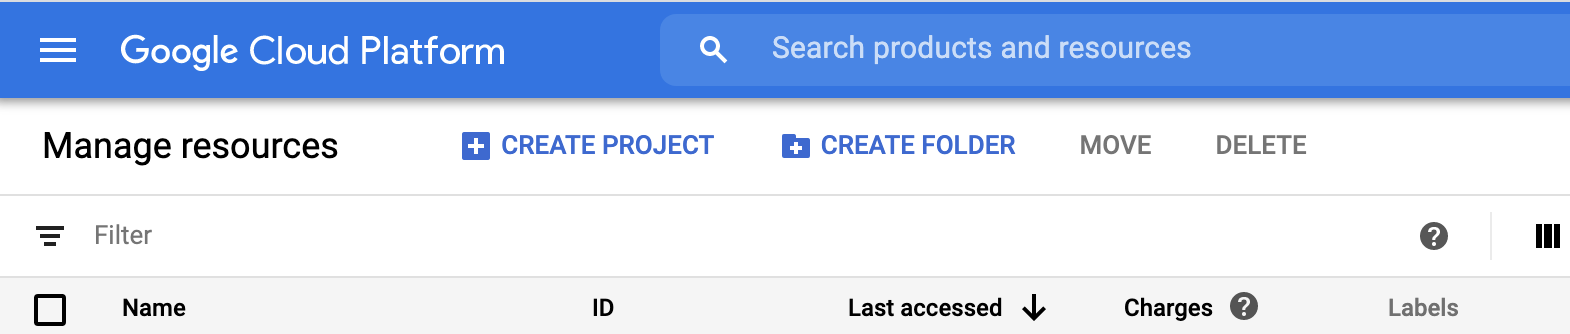

And attach it under your organization.
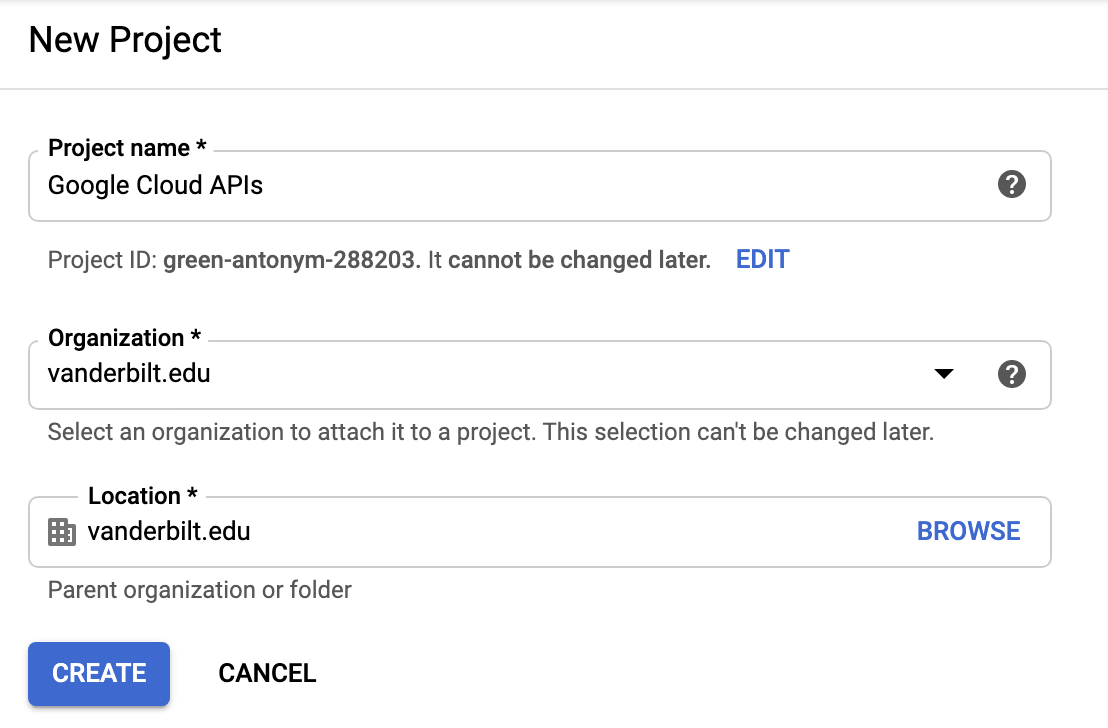


## Step 3: Getting a Google API Credential.
First things first - we need to authenticate against the Google Cloud APIs.


First, visit <a href="http://console.cloud.google.com/apis">API console</a>, choose "Credentials" on the left-hand menu.  Choose "Create Credentials" and generate an API key for your application. You should probably restrict it by IP address to prevent abuse, but for now, just  leave that field blank and delete the API key after trying out this demo.

Then, when you have your key, you will enter it in this first executable cell:

In [ ]:
import getpass

APIKEY = getpass.getpass()

··········


## Step 4: Enable APIs
From the same API console, choose "Dashboard" on the left-hand menu and "Enable API".

For this tutorial, enable the following APIs for your project (search for them) if they are not already enabled:
<ol>
<li> Google Translate API </li>
<li> Google Cloud Vision API </li>
</ol>




## Example invoking Translate API

Let's see a simple example of calling the API first. ([Google Cloud Translation](https://cloud.google.com/translate/docs/) documentation)

Also note that this is a service.  The translation is not happening on the VM running the notebook, but is running as a service.  This is where we start seeing the true power of cloud compute!

In [ ]:
# running Translate API
from googleapiclient.discovery import build
service = build('translate', 'v2', developerKey=APIKEY)

# use the service
inputs = ['is it really this easy?', 'amazing technology', 'wow']
outputs = service.translations().list(source='en', target='fr', q=inputs).execute()
# print outputs
for input, output in zip(inputs, outputs['translations']):
  print(u"{0} -> {1}".format(input, output['translatedText']))

is it really this easy? -> est-ce vraiment si simple?
amazing technology -> technologie incroyable
wow -> sensationnel


That is really cool - how would a Gallego (a person from Galicia in the Northwest corner of Spain) say it?

In [ ]:
outputs = service.translations().list(source='en', target='gl', q=inputs).execute()
# print outputs
for input, output in zip(inputs, outputs['translations']):
  print(u"{0} -> {1}".format(input, output['translatedText']))

is it really this easy? -> ¿é realmente sinxelo?
amazing technology -> tecnoloxía sorprendente
wow -> wow


# Project: Understanding a sign in foreign language

Today, we want to demo the strength of these services with a puposed scenerio. We are traveling in another country and suddenly see a sign with words on it. 

How can we use a combination of Google Cloud APIs to read the sign?

As you would imagine, this is a two-step process:


1.   Use computer vision to read the sign
2.   Translate to a language we know




## Invoke Vision API

The [Vision API](https://cloud.google.com/vision/docs/) can work off an image in Cloud Storage or embedded directly into a POST message. I'll use Cloud Storage and do OCR on this image: <img src="https://storage.googleapis.com/cloud-training-demos/vision/sign2.jpg" width="200" />.  
That photograph is from http://www.publicdomainpictures.net/view-image.php?image=15842.

In [ ]:
# Running Vision API
import base64
IMAGE="gs://cloud-training-demos/vision/sign2.jpg"
vservice = build('vision', 'v1', developerKey=APIKEY)
request = vservice.images().annotate(body={
        'requests': [{
                'image': {
                    'source': {
                        'gcs_image_uri': IMAGE
                    }
                },
                'features': [{
                    'type': 'TEXT_DETECTION',
                    'maxResults': 3,
                }]
            }],
        })
responses = request.execute(num_retries=3)
#print the recognized results
print(responses['responses'][0]['textAnnotations'][0]['description'])

请您爱护和保
护卫生创建优
美水环境



Here, the vision api have the power of telling us what language is that in.

In [ ]:
foreigntext = responses['responses'][0]['textAnnotations'][0]['description']
foreignlang = responses['responses'][0]['textAnnotations'][0]['locale']
print('Language Code = {}.  Foreign Text:\n{}'.format(foreignlang,foreigntext))

Language Code = zh.  Foreign Text:
请您爱护和保
护卫生创建优
美水环境



## Translate sign

Now that we know the sign is in **zh**, which represents **Chinese**. Let's run it through the translator.

In [ ]:
inputs=[foreigntext]
outputs = service.translations().list(source=foreignlang, target='en', q=inputs).execute()
# print outputs
for input, output in zip(inputs, outputs['translations']):
  print(u"{0} -> {1}".format(input, output['translatedText']))

请您爱护和保
护卫生创建优
美水环境
 -> Please care and protect sanitation to create a beautiful water environment


# More OCR with the Vision API
OCR (Optical character recognition) is actually quite difficult to do well.  So let's try the engine on a very difficult sign (text with skew):

In [ ]:
import IPython.display

IPython.display.Image(url="https://get.pxhere.com/photo/road-highway-advertising-travel-sign-community-usa-landmark-street-sign-attraction-historic-tourism-signage-road-sign-illinois-history-66-traffic-sign-route-66-mother-road-odell-644464.jpg",
                      width=600)

In [ ]:
IMAGE="https://get.pxhere.com/photo/road-highway-advertising-travel-sign-community-usa-landmark-street-sign-attraction-historic-tourism-signage-road-sign-illinois-history-66-traffic-sign-route-66-mother-road-odell-644464.jpg"
vservice = build('vision', 'v1', developerKey=APIKEY)
request = vservice.images().annotate(body={
        'requests': [{
                'image': {
                    'source': {
                        'imageUri': IMAGE
                    }
                },
                'features': [{
                    'type': 'TEXT_DETECTION',
                    'maxResults': 5,
                }]
            }],
        })
responses = request.execute(num_retries=5)
print(responses['responses'][0]['textAnnotations'][0]['description'])

ROUTE
ROADSIDE
ATTRACTION
99
1932 STANDARD OIL GAS STATION, ODELL, ILLINOIS
This restoration is a project of the Route 66 Association of
llinois Preservation Committee. Identified November 9, 1997
on the National Register of Historic Places.
TV



Checking the end of the text with the sign - how did we do?  We missed one full line of text - so OCR still remains a difficult text, even for Google!

# What's next?

There is a lot more that you can do with Google Cloud APIs. Take a look at the [list of libraries ](https://cloud.google.com/apis/docs/cloud-client-libraries)available. There is a lot more problems that can be solved using these APIs or a combination of some APIs.

For example,
1.   Sentiment Analysis
2.   Speech to Text
3.   Text to Speech

.
.
.




Be creative.

Find a project that interests you.

Start playing around with the powerful APIs!

# Last Thing: Clean up 

Remember to delete the API key by visiting <a href="http://console.cloud.google.com/apis">API console</a>.

